<a href="https://colab.research.google.com/github/Codeventure-team6/Proyek-codeventure/blob/vidky/Analisi_Jenis_%26_penjualan_buah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#2. Melakukan import library Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#3. Membaca file csv yang akan dianalisis (dari github)
data = pd.read_csv('https://raw.githubusercontent.com/Codeventure-team6/Proyek-codeventure/refs/heads/master/dataset/Fruit%20Sales%20Data.csv')
data

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
4,Orange,40.0,NaN,Yes
5,Mango,35.0,58000.0,Yes
6,Apple,NaN,52000.0,No
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes


In [5]:
#Menampilkan informasi nilai yang hilang
print("Nilai hilang sebelum dibersihkan:")
print(data.isnull().sum())

Nilai hilang sebelum dibersihkan:
Fruit_Name      0
Weight_in_Kg    2
Total_Cost      2
Purchased       0
dtype: int64


In [3]:
# Membersihkan data yang wight dan total nya 0
df_clean = data.dropna(subset=['Total_Cost'])
df_clean = df_clean.dropna(subset=['Weight_in_Kg'])
df_clean

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
5,Mango,35.0,58000.0,Yes
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes
10,Orange,47.0,63000.0,No
12,Mango,46.0,76000.0,No


In [ ]:
# Menjumlahkan berat berdasarkan nama buah
fruit_weights = df_clean.groupby("Fruit_Name")["Weight_in_Kg"].sum()
fruit_weights

,Weight_in_Kg
Fruit_Name,
Apple,105.0
Mango,108.0
Orange,106.0
Strawberry,136.0


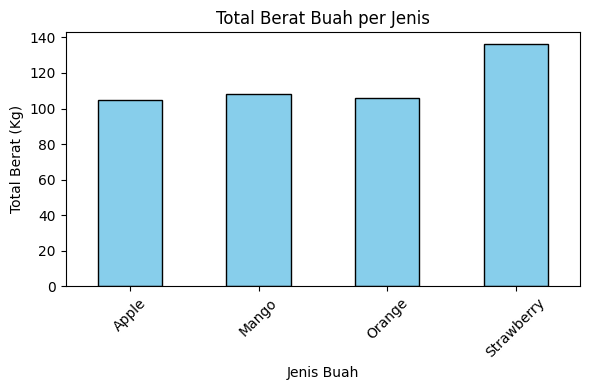

In [ ]:
# Gambar grafik batang
plt.figure(figsize=(6, 4))
fruit_weights.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Berat Buah per Jenis")
plt.xlabel("Jenis Buah")
plt.ylabel("Total Berat (Kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cost_per_fruit = df_clean.groupby('Fruit_Name')['Total_Cost'].sum()
cost_per_fruit

,Total_Cost
Fruit_Name,
Apple,177000.0
Mango,182000.0
Orange,151000.0
Strawberry,223000.0


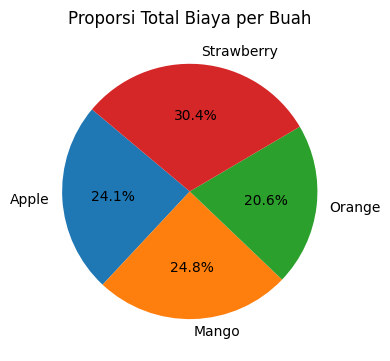

In [ ]:
# Gambar pie chart pengelompokkan buah berdasarkan Purchased
plt.figure(figsize=(4, 4))
cost_per_fruit.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Total Biaya per Buah')
plt.ylabel('')
plt.tight_layout()
plt.show()

Koefisien regresi:
Weight_in_Kg: 1577.7200
Correlation between Weight_in_Kg and Total: 0.9129066417075319

Intercept: 1261.4513
R² score: 0.8334
Mean Squared Error: 37192619.7776


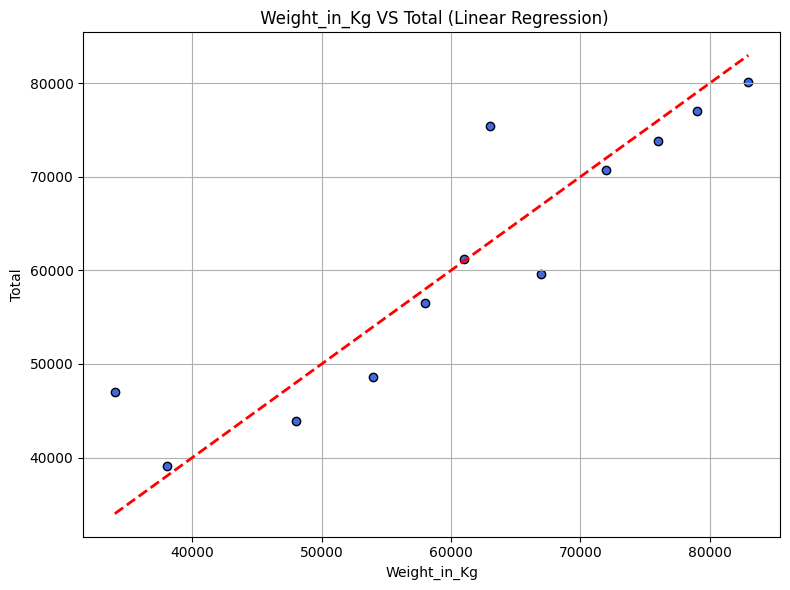

In [ ]:
# ==== BONUS =====

# 2. Fitur dan target
# X is selected as a DataFrame with one column
X = df_clean[['Weight_in_Kg']]
y = df_clean['Total_Cost']

# 3. Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 4. Evaluasi
print("Koefisien regresi:")
# Iterate through the columns of the X DataFrame for printing
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

weight_total_correlation = df_clean['Weight_in_Kg'].corr(df_clean['Total_Cost'])

print(f"Correlation between Weight_in_Kg and Total: {weight_total_correlation}")
print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R² score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

# 5. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='royalblue', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Weight_in_Kg')
plt.ylabel('Total')
plt.title(' Weight_in_Kg VS Total (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()